# Auswirkung der Größe des Datensatzes auf das neuronales Netz

#### Importe

In [1]:
import torch
from torch import nn
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.metrics import r2_score as r2
from sklearn.metrics import max_error
import seaborn as sns

#### Default Datentyp Tensor

In [2]:
torch.set_default_dtype(torch.float64)

#### Laden des Train und Testloss über den Trainingsverlauf

In [5]:
# Standardisierungsdaten
loss_data_file_1 = Path.cwd().parent / 'data' / 'models' / 'hyperparams' / 'loss_005_002.npz'
loss_data_1 = np.load(loss_data_file_1)
loss_data_file_2 = Path.cwd().parent / 'data' / 'models' / 'hyperparams' / 'loss_005_014.npz'
loss_data_2 = np.load(loss_data_file_2)

train_loss_1 = np.array(loss_data_1['train_loss'])
test_loss_1 = np.array(loss_data_1['test_loss'])
train_loss_2 = np.array(loss_data_2['train_loss'])
test_loss_2 = np.array(loss_data_2['test_loss'])


#### Importing Plot Stylesheet

In [10]:
plt.style.use(['seaborn-v0_8-paper',Path.cwd().parent / 'plotstyle' / 'paper.mplstyle'])
cm = 1/2.54

#### Plot loss vs epoch

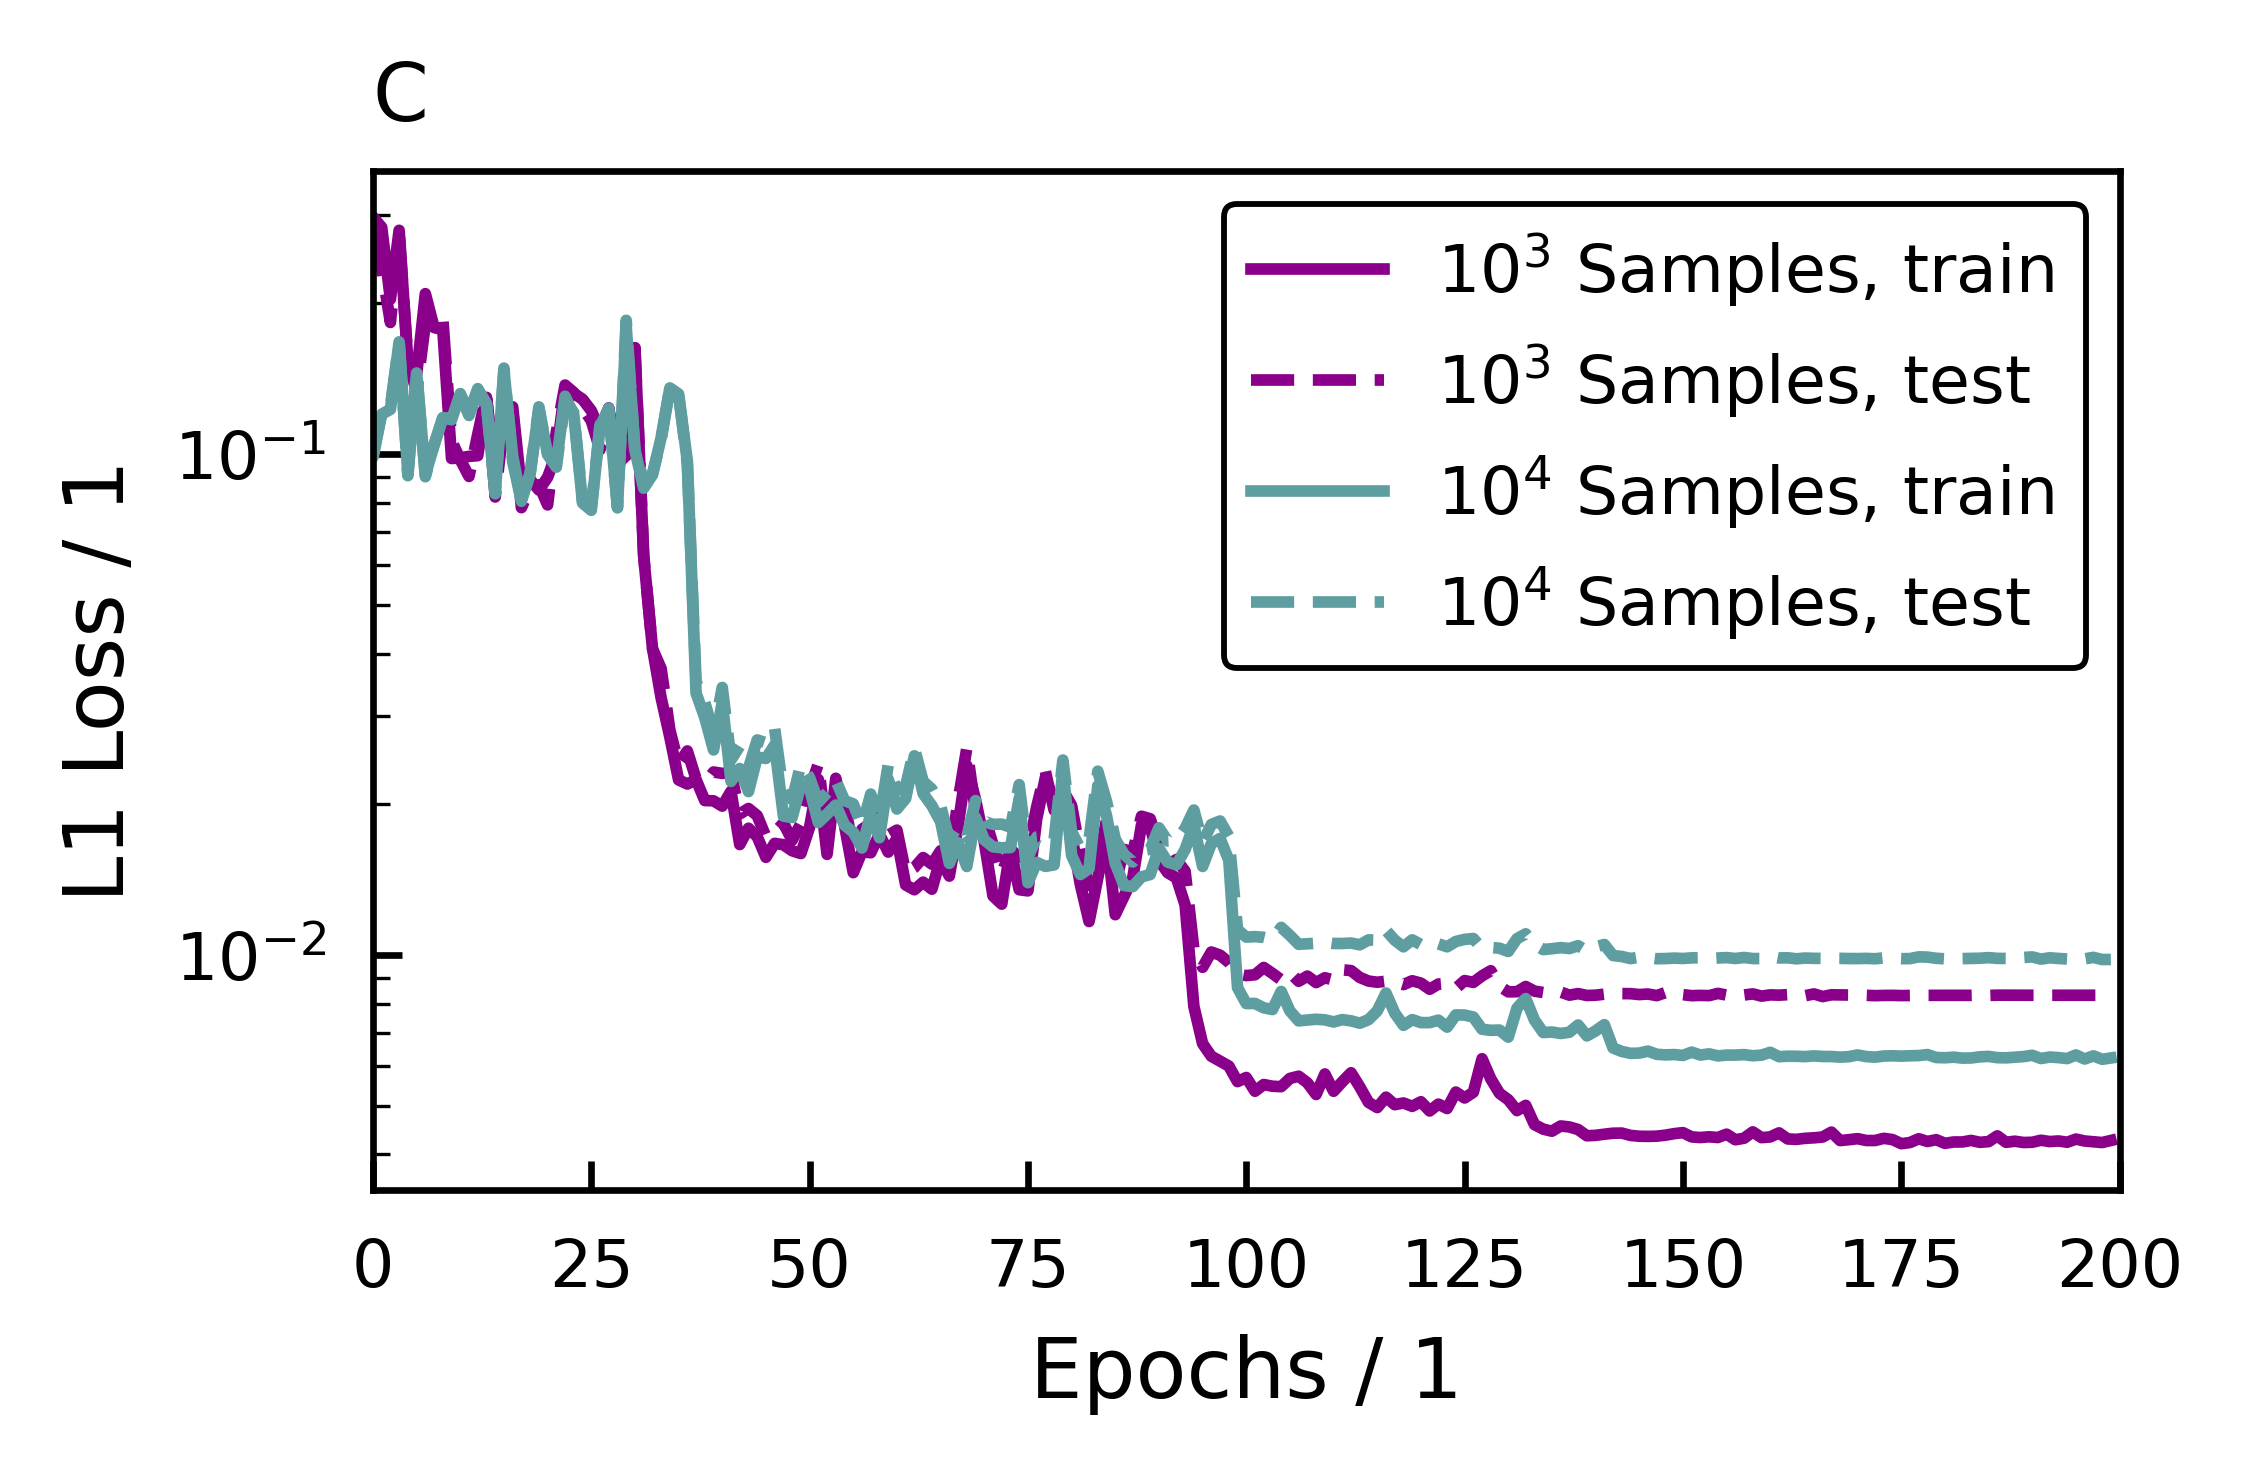

In [14]:
fig,ax = plt.subplots(figsize = (9.75*cm,6.5*cm))

ax.semilogy(train_loss_1, '-', color = 'darkmagenta', label='$10^3$ Samples, train ')
ax.semilogy(test_loss_1, '--', color = 'darkmagenta', label='$10^3$ Samples, test')
ax.semilogy(train_loss_2, '-', color = 'cadetblue', label='$10^4$ Samples, train ')
ax.semilogy(test_loss_2, '--', color = 'cadetblue', label='$10^4$ Samples, test')

#plt.title("Train and Test Loss")
ax.set(xlabel = 'Epochs / 1', ylabel = 'L1 Loss / 1') #Beschriftung Achsen; Kursiv durch $$; Index durch _{}
ax.set(xlim=(0,200))
ax.tick_params(direction = 'in') #, length = 20, width = 3)
ax.set_title('C', loc='left')

plt.legend()
plt.tight_layout()
plt.show()

In [15]:
#fig.savefig(Path.cwd().parent / 'plots/ann/TKA_SRA_PA_022_datasetsize.png', bbox_inches = 'tight')